### **PROJECT 4 PROPOSAL LEVEL 1**


**Idea: Sentiment Analysis**


 **Description:**


The primary goal is to develop a sentiment analysis model that can accurately classify the sentiment of text data, providing valuable insights into public opinion, customer feedback, and social media trends.


 **Dataset:-** https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset


 **Key Concepts and Challenges:**


1. Sentiment Analysis: Analyzing text data to determine the emotional tone, whether positive, negative, or neutral.


2. Natural Language Processing (NLP): Utilizing algorithms and models to understand and process human language.


3. Machine Learning Algorithms: Implementing models for sentiment classification, such as Support Vector Machines, Naive Bayes, or deep learning architectures.


4. Feature Engineering: Identifying and extracting relevant features from text data to enhance model performance.


5. Data Visualization: Presenting sentiment analysis results through effective visualizations for clear interpretation.

In [1]:
# pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import re
import string

In [2]:
# Load the Twitter_Data.csv dataset 
df = pd.read_csv("Twitter_Data.csv") 

In [3]:
print(" Dataset Shape:", df.shape)
print("\n Columns:", df.columns.tolist())
print("\n First 5 Rows:\n", df.head())
print("\n Sentiment Distribution:\n", df['category'].value_counts())

 Dataset Shape: (162980, 2)

 Columns: ['clean_text', 'category']

 First 5 Rows:
                                           clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

 Sentiment Distribution:
 category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


In [4]:
#  Text Cleaning
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  #  Load once outside

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])  #  Use preloaded list
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)

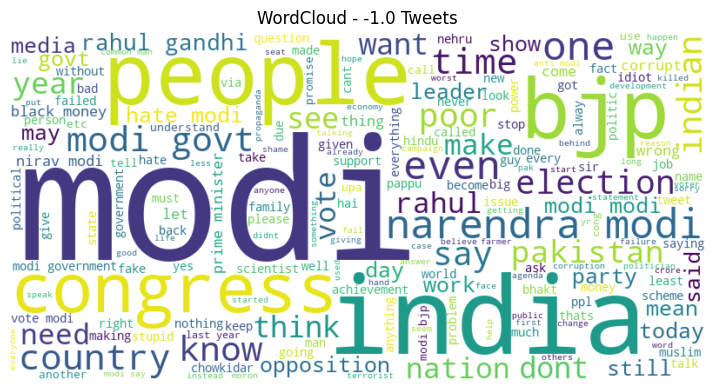

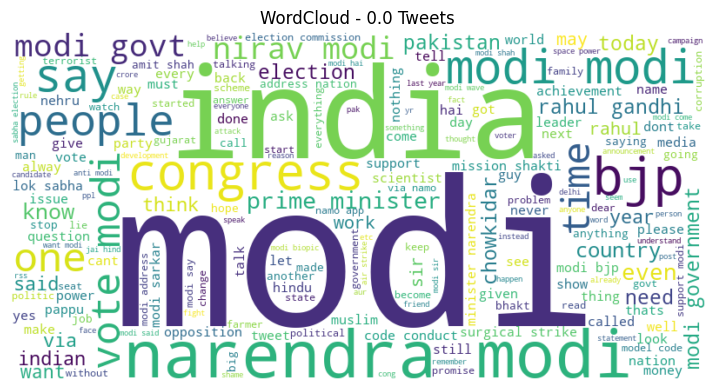

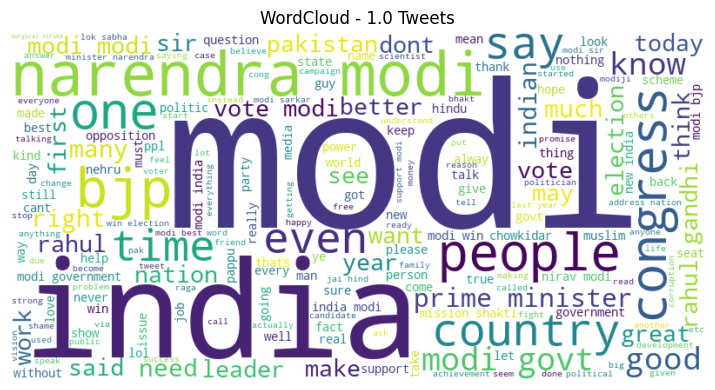

 No words available for sentiment: nan


In [5]:
# Word cloud for each sentiment
for sentiment in df['category'].unique():
    text = ' '.join(df[df['category'] == sentiment]['clean_text'].dropna())
    if text.strip():  # Check that text is not empty
        plt.figure(figsize=(8, 4))
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud - {sentiment} Tweets")
        plt.tight_layout()
        plt.show()
    else:
        print(f" No words available for sentiment: {sentiment}")

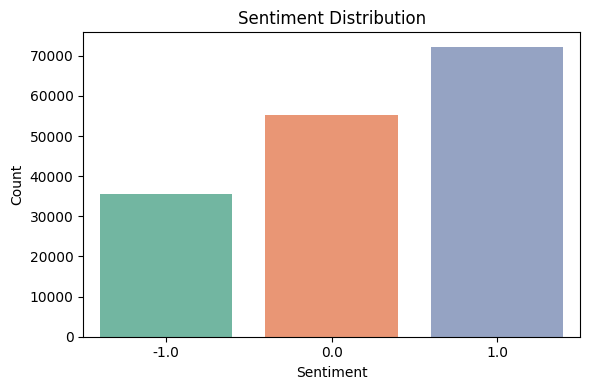

In [6]:
# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='category', hue='category', data=df, palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
# Drop rows with missing labels or text
df = df.dropna(subset=['clean_text', 'category'])

#  Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['category']

In [8]:
#  Model Training - Multinomial Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [9]:
#  Model Evaluation
y_pred = model.predict(X_test)
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Classification Report:
               precision    recall  f1-score   support

        -1.0       0.71      0.61      0.66      7230
         0.0       0.87      0.60      0.71     10961
         1.0       0.68      0.88      0.77     14404

    accuracy                           0.73     32595
   macro avg       0.75      0.70      0.71     32595
weighted avg       0.75      0.73      0.72     32595



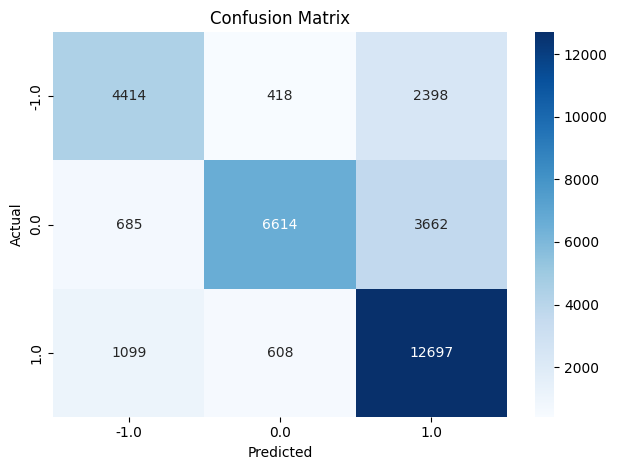

In [10]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

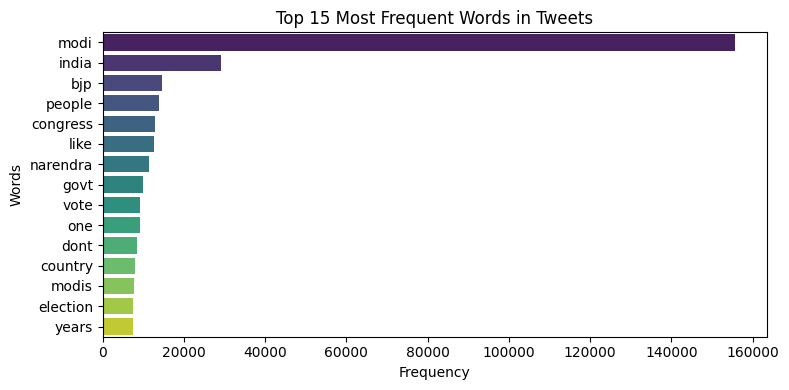

In [11]:
from collections import Counter

# Flatten all words
all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words).most_common(15)

# Barplot
words, counts = zip(*word_freq)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(counts), y=list(words), hue=list(words), palette="viridis", legend=False)
plt.title("Top 15 Most Frequent Words in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()